In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from maze import Maze
from position import Position
import search as Search
import search_fire as SearchFire
import utilities as Util
import fire_analysis as FireAnalysis


# Algorithm assessment

### Constructing mazes for evaluating the algorithms 

In [2]:
import utilities as Util 

dim = 30
p = 0.3 
q_list = np.linspace(0, 1, 11)
n = 30
f_man = 25
f_euc = 30
maze_dict = Util.generate_valid_fire_mazes(dim, q_list, p, n)


### Evaluating the trivial solutions

Trivial solution using A* manhattan distance

In [3]:
trivAman_stats = FireAnalysis.evaluate_trivial_Aman(maze_dict, dim)

Working q: 0.0		 1 of 11
Working q: 0.1		 2 of 11
Working q: 0.2		 3 of 11
Working q: 0.3		 4 of 11
Working q: 0.4		 5 of 11
Working q: 0.5		 6 of 11
Working q: 0.6		 7 of 11
Working q: 0.7		 8 of 11
Working q: 0.8		 9 of 11
Working q: 0.9		 10 of 11
Working q: 1.0		 11 of 11


In [4]:
trivAeuc_stats = FireAnalysis.evaluate_trivial_Aeuc(maze_dict, dim)

Working q: 0.0		 1 of 11
Working q: 0.1		 2 of 11
Working q: 0.2		 3 of 11
Working q: 0.3		 4 of 11
Working q: 0.4		 5 of 11
Working q: 0.5		 6 of 11
Working q: 0.6		 7 of 11
Working q: 0.7		 8 of 11
Working q: 0.8		 9 of 11
Working q: 0.9		 10 of 11
Working q: 1.0		 11 of 11


### Adjusted A* algorithms

These A* algorithms use heuristic functions that avoid the nearest fire cell.   
The first uses manhattan distance, and the second uses euclidean distance.   

In [5]:
fireAman_stats = FireAnalysis.evaluate_fire_Astar(maze_dict, dim, SearchFire.fire_heuristic_3, f_man)

Working q: 0.0		 1 of 11
Working q: 0.1		 2 of 11
Working q: 0.2		 3 of 11
Working q: 0.3		 4 of 11
Working q: 0.4		 5 of 11
Working q: 0.5		 6 of 11
Working q: 0.6		 7 of 11
Working q: 0.7		 8 of 11
Working q: 0.8		 9 of 11
Working q: 0.9		 10 of 11
Working q: 1.0		 11 of 11


In [6]:
fireAeuc_stats = FireAnalysis.evaluate_fire_Astar(maze_dict, dim, SearchFire.fire_heuristic_4, f_euc)

Working q: 0.0		 1 of 11
Working q: 0.1		 2 of 11
Working q: 0.2		 3 of 11
Working q: 0.3		 4 of 11
Working q: 0.4		 5 of 11
Working q: 0.5		 6 of 11
Working q: 0.6		 7 of 11
Working q: 0.7		 8 of 11
Working q: 0.8		 9 of 11
Working q: 0.9		 10 of 11
Working q: 1.0		 11 of 11


In [8]:
maze = Maze(10, 0.2, 0.3)
a, b, = SearchFire.state_setup(maze)

In [9]:
a.position_path[-1][0]

0

# visualizing the results

Merging data together into a pandas DataFrame.

In [7]:

col_names = "q algorithm percent_success avg_path_length avg_nodes_expanded avg_max_fringe_size".split()

df = pd.DataFrame(columns=col_names)


algo = "trivial_Astar_manhattan"
for key, val in trivAman_stats.items():
    
    q = np.round(key, 3)
    algorithm = algo
    p, pl, ane, amf = val
    
    df = df.append(pd.Series([q, algorithm, p, pl, ane, amf], index=df.columns), ignore_index=True)


algo = "trivial_Astar_euclidean"
for key, val in trivAeuc_stats.items():
    
    q = np.round(key, 3)
    algorithm = algo
    p, pl, ane, amf = val
    
    df = df.append(pd.Series([q, algorithm, p, pl, ane, amf], index=df.columns), ignore_index=True)
    
    
algo = "adjusted_Astar_manhattan"
for key, val in fireAman_stats.items():
    
    q = np.round(key, 3)
    algorithm = algo
    p, pl, ane, amf = val
    
    df = df.append(pd.Series([q, algorithm, p, pl, ane, amf], index=df.columns), ignore_index=True)
    

    
algo = "adjusted_Astar_euclidean"
for key, val in fireAeuc_stats.items():
    
    q = np.round(key, 3)
    algorithm = algo
    p, pl, ane, amf = val
    
    df = df.append(pd.Series([q, algorithm, p, pl, ane, amf], index=df.columns), ignore_index=True)
    
  


In [27]:
df

,q,algorithm,percent_success,avg_path_length,avg_nodes_expanded,avg_max_fringe_size
0,0.0,trivial_Astar_manhattan,1.000000,39.866667,138.200000,28.600000
1,0.1,trivial_Astar_manhattan,1.000000,39.866667,145.700000,28.866667
2,0.2,trivial_Astar_manhattan,0.966667,39.933333,145.833333,28.066667
3,0.3,trivial_Astar_manhattan,0.666667,40.533333,153.966667,28.733333
4,0.4,trivial_Astar_manhattan,0.766667,39.533333,148.100000,30.600000
5,0.5,trivial_Astar_manhattan,0.500000,40.666667,141.866667,26.466667
6,0.6,trivial_Astar_manhattan,0.366667,40.066667,144.200000,27.000000
7,0.7,trivial_Astar_manhattan,0.233333,40.533333,157.066667,29.233333
8,0.8,trivial_Astar_manhattan,0.100000,40.866667,146.466667,28.633333
9,0.9,trivial_Astar_manhattan,0.000000,40.133333,152.433333,30.600000


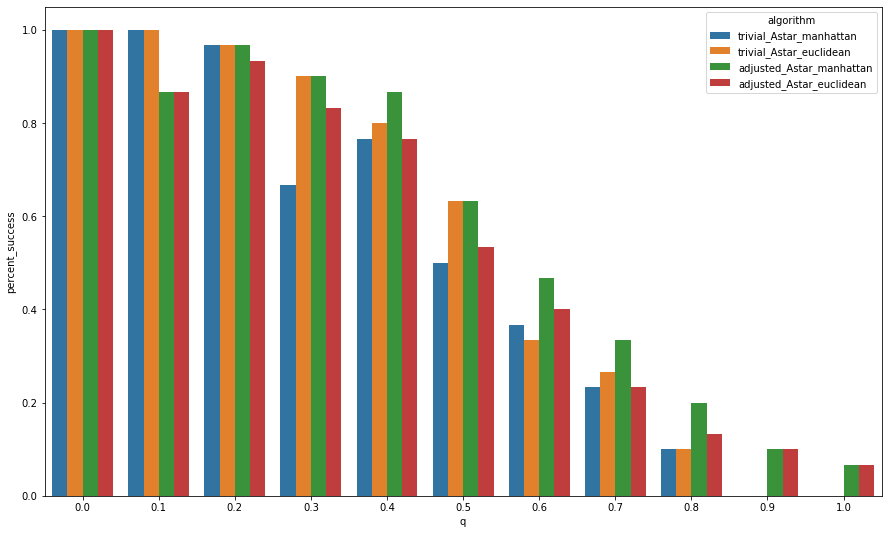

In [28]:
fig = plt.figure(figsize=(15,9))
sns.barplot('q', 'percent_success', hue='algorithm', data=df)